#Support Vector Machines

In [ ]:
# Q1: What is the mathematical formula for a linear SVM?
# The mathematical formula for a linear Support Vector Machine (SVM) involves finding a hyperplane that best separates the data into two classes.
# The decision boundary for a linear SVM can be expressed as:

# f(x)=wTx+b

# where:
# x is the feature vector.
# w is the weight vector.
# b is the bias term.

In [ ]:
# Q2: What is the objective function of a linear SVM?
# The objective function of a linear SVM aims to maximize the margin between the two classes while minimizing classification errors.

In [ ]:
# Q3: What is the kernel trick in SVM?
# The kernel trick allows SVMs to classify data that is not linearly separable by transforming the data into a higher-dimensional space where it is linearly separable.
# Instead of computing the dot product xi⋅xj directly, the kernel trick computes a function K(xi,xj) that represents the dot product in the higher-dimensional space.

In [ ]:
# Q4: What is the role of support vectors in SVM? Explain with an example.
# Support vectors are the data points that lie closest to the decision boundary (hyperplane) and are critical in defining the position and orientation of the hyperplane. They are the points that, if removed or moved, would change the position of the hyperplane.

# Example:
# Consider a 2D dataset where two classes are linearly separable. The support vectors are the points that lie on the edge of the margin, closest to the separating hyperplane. In a well-separated dataset, the number of support vectors is minimal, and they define the maximum margin separating the two classes.

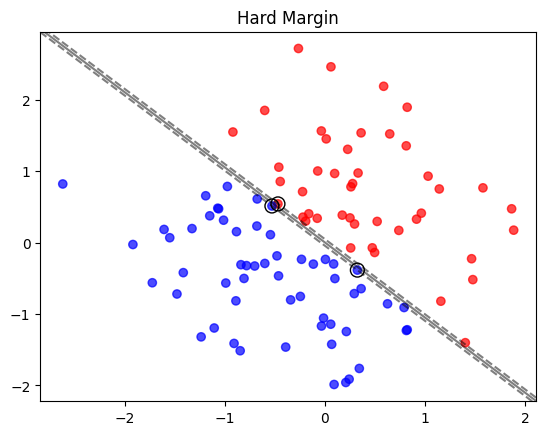

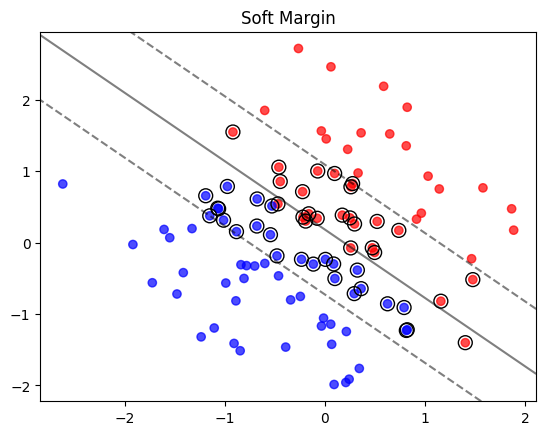

In [1]:
# Q5: Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.
# Hyperplane: The decision boundary separating two classes in an SVM.
# Marginal plane: The planes parallel to the hyperplane at a distance equal to the margin from the hyperplane.
# Soft margin: Allows some misclassification and uses slack variables to handle overlap in data.
# Hard margin: Assumes perfect separability with no overlap or misclassification.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.array([1 if x[0] + x[1] > 0 else -1 for x in X])

# Fit SVM with different configurations
models = {
    'Hard Margin': SVC(kernel='linear', C=1e10),
    'Soft Margin': SVC(kernel='linear', C=0.1)
}
for name, model in models.items():
    model.fit(X, y)

    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title(name)
plt.show()


Accuracy: 1.00


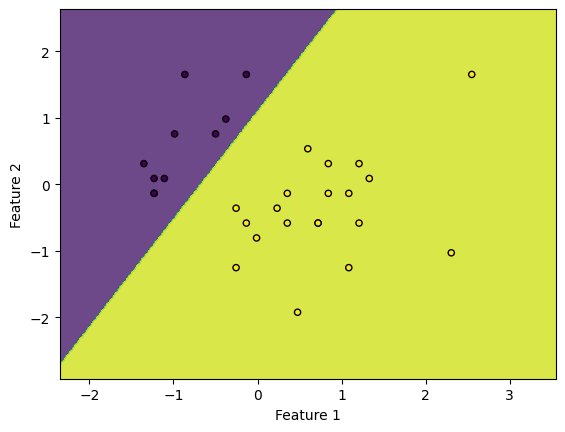

C=0.01: Accuracy=0.90
C=0.1: Accuracy=1.00
C=1: Accuracy=1.00
C=10: Accuracy=1.00
C=100: Accuracy=1.00


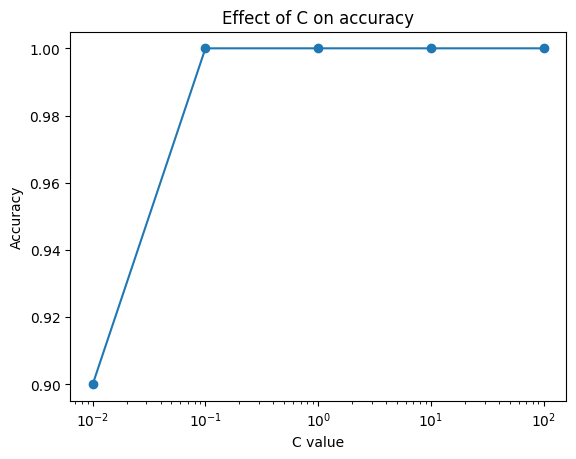

In [2]:
# Q6: SVM Implementation through Iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only take the first two features for visualization
y = iris.target

# Convert the problem to binary classification (setosa vs non-setosa)
y = (y != 0).astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundaries(X_test, y_test, clf)

# Try different values of the regularisation parameter C
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'C={C}: Accuracy={accuracy:.2f}')

plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Effect of C on accuracy')
plt.show()


In [4]:
# Bonus Task: Implement a linear SVM classifier from scratch
# Here's a basic implementation of a linear SVM from scratch using gradient descent
class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Train and evaluate the custom SVM
custom_svm = LinearSVM()
custom_svm.fit(X_train, y_train)
predictions = custom_svm.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Custom SVM Accuracy: {accuracy:.2f}')

# Compare with scikit-learn SVM
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred)
print(f'Scikit-learn SVM Accuracy: {sklearn_accuracy:.2f}')




Custom SVM Accuracy: 0.67
Scikit-learn SVM Accuracy: 1.00
